# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [73]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [74]:
def max_element(arr):
    zero_indices = np.where(arr[:-1] == 0)[0] + 1
    if len(zero_indices) == 0:
        return None
    return arr[zero_indices].max()

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print("1) max_element:", max_element(x))

1) max_element: 5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [75]:
def nearest_value(X, v):
    return X.flat[np.abs(X - v).argmin()]
X = np.arange(0, 10).reshape((2, 5))
print("2) nearest_value:", nearest_value(X, 3.6))

2) nearest_value: 4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [76]:
def scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    std[std == 0] = 1
    return (X - mean) / std

X = np.random.randint(0, 10, (3, 4))
print("3) scale:\n", scale(X))

3) scale:
 [[-1.13554995 -1.22474487  1.37281295  0.        ]
 [ 1.29777137  1.22474487 -0.39223227  1.22474487]
 [-0.16222142  0.         -0.98058068 -1.22474487]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [77]:
def get_stats(X):
    det = np.linalg.det(X)              # определитель
    trace = np.trace(X)                 # след матрицы (сумма диагональных элементов)
    min_val = X.min()                   # минимальный элемент
    max_val = X.max()                   # максимальный элемент
    frob_norm = np.linalg.norm(X, 'fro')# норма Фробениуса
    eigvals = np.linalg.eigvals(X)      # собственные числа
    inv_matrix = np.linalg.inv(X)       # обратная матрица

    return {
        'Определитель': det,
        'След': trace,
        'Мин. элемент': min_val,
        'Макс. элемент': max_val,
        'Норма Фробениуса': frob_norm,
        'Собственные числа': eigvals,
        'Обратная матрица': inv_matrix
    }


# создаём матрицу из нормального распределения N(10, 1)
np.random.seed(0)
X = np.random.normal(10, 1, size=(3, 3))

stats = get_stats(X)
for key, value in stats.items():
    print(f'{key}:')
    print(value)
    print()

Определитель:
0.7818319812364621

След:
33.528391484324075

Мин. элемент:
9.02272212012359

Макс. элемент:
12.240893199201459

Норма Фробениуса:
32.46572464904387

Собственные числа:
[3.23834750e+01 2.14904498e-02 1.12342601e+00]

Обратная матрица:
[[ 36.5667531    6.6479615  -46.62521112]
 [-28.58137887  -4.85001924  36.12769045]
 [-12.01616837  -2.52907069  15.73657777]]



**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [79]:
max_values = []

for exp_num in range(100):
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)

    C = A @ B

    max_values.append(C.max())

mean_max = np.mean(max_values)

quantile_95 = np.quantile(max_values, 0.95)

print("Среднее значение максимальных элементов:", mean_max)
print("95% квантиль:", quantile_95)

Среднее значение максимальных элементов: 8.241076512654626
95% квантиль: 11.771578454849829


In [80]:
import pandas as pd
%matplotlib inline

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [81]:
data = pd.read_csv('2008.csv')

most_common_cancellation = data['CancellationCode'].value_counts().idxmax()
count = data['CancellationCode'].value_counts().max()

print(f"Самая частая причина отмены рейса: {most_common_cancellation}")
print(f"Количество таких отмен: {count}")

Самая частая причина отмены рейса: A
Количество таких отмен: 563


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [82]:
mean_distance = data['Distance'].mean()
min_distance = data['Distance'].min()
max_distance = data['Distance'].max()

print(f"Среднее расстояние: {mean_distance:.2f}")
print(f"Минимальное расстояние: {min_distance}")
print(f"Максимальное расстояние: {max_distance}")

Среднее расстояние: 724.51
Минимальное расстояние: 31
Максимальное расстояние: 4962


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [83]:
min_distance = data['Distance'].min()
print(f"Минимальное расстояние: {min_distance}")

suspicious_flights = data[data['Distance'] == min_distance]

print("\nРейсы с минимальным расстоянием:")
print(suspicious_flights[['Year', 'Month', 'DayofMonth', 'FlightNum', 'UniqueCarrier', 'Origin', 'Dest', 'Distance']])

# Проверим, какие расстояния у этих же рейсов были в другие дни
same_flights_other_days = data[
    data['FlightNum'].isin(suspicious_flights['FlightNum']) &
    data['UniqueCarrier'].isin(suspicious_flights['UniqueCarrier']) &
    (data['Distance'] != min_distance)
]

print("\nРасстояния тех же рейсов в другие дни:")
print(same_flights_other_days[['Year', 'Month', 'DayofMonth', 'FlightNum', 'UniqueCarrier', 'Origin', 'Dest', 'Distance']])

Минимальное расстояние: 31

Рейсы с минимальным расстоянием:
       Year  Month  DayofMonth  FlightNum UniqueCarrier Origin Dest  Distance
1116   2008     12          30         65            AS    WRG  PSG        31
6958   2008     12          26         65            AS    WRG  PSG        31
17349  2008      8          18         64            AS    PSG  WRG        31
27534  2008      3          11         64            AS    PSG  WRG        31
46082  2008      8           9         65            AS    WRG  PSG        31
48112  2008      2          28         64            AS    PSG  WRG        31

Расстояния тех же рейсов в другие дни:
       Year  Month  DayofMonth  FlightNum UniqueCarrier Origin Dest  Distance
1389   2008      3          13         64            AS    KTN  SEA       680
1517   2008      7          10         65            AS    SEA  KTN       680
3869   2008      7           1         64            AS    WRG  KTN        82
4466   2008      6          29         64

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [84]:
departures = data['Origin'].value_counts()


top_airport = departures.idxmax()
top_count = departures.max()

print(f"Больше всего вылетов из аэропорта: {top_airport}")
print(f"Количество вылетов: {top_count}")

Больше всего вылетов из аэропорта: ATL
Количество вылетов: 4134


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [85]:
mean_airtime_by_airport = data.groupby('Origin')['AirTime'].mean()

max_airport = mean_airtime_by_airport.idxmax()
max_value = mean_airtime_by_airport.max()

print("Аэропорт с наибольшим средним временем полёта:")
print(f"{max_airport} — {max_value:.2f} минут")

Аэропорт с наибольшим средним временем полёта:
SJU — 205.20 минут


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [86]:
grouped = data.groupby('Origin')

filtered = grouped.filter(lambda x: len(x) >= 1000)

delay_ratio = (
    filtered.groupby('Origin')['DepDelay']
    .apply(lambda x: (x > 0).mean())
)

worst_airport = delay_ratio.idxmax()
max_ratio = delay_ratio.max()

print("Аэропорт с наибольшей долей задержанных рейсов:")
print(f"{worst_airport} — {max_ratio:.2%} задержанных вылетов")

Аэропорт с наибольшей долей задержанных рейсов:
EWR — 51.12% задержанных вылетов


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [87]:
# Проверим, есть ли пропуски
has_missing = data.isnull().values.any()
print("Есть ли пропуски в данных:", has_missing)

# Общее количество пропущенных элементов
total_missing = data.isnull().sum().sum()
print("Общее количество пропусков:", total_missing)

# Сколько объектов имеют хотя бы один пропуск
rows_with_missing = data.isnull().any(axis=1).sum()
print("Количество объектов с хотя бы одним пропуском:", rows_with_missing)

# Сколько признаков содержат хотя бы один пропуск
cols_with_missing = data.isnull().any().sum()
print("Количество признаков с хотя бы одним пропуском:", cols_with_missing)


Есть ли пропуски в данных: True
Общее количество пропусков: 355215
Количество объектов с хотя бы одним пропуском: 70000
Количество признаков с хотя бы одним пропуском: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [88]:
# Проверим, есть ли пропуски в целевой переменной DepDelay
missing_target = data['DepDelay'].isnull().sum()
print(f"Количество пропусков в целевой переменной DepDelay: {missing_target}")

print("\nПримеры строк с пропущенными значениями DepDelay:")
print(data[data['DepDelay'].isnull()].head())

# Пропуски в DepDelay, соответствуют отменённым рейсам (Cancelled = 1),
# т.к. для них нет фактического времени вылета. Эти объекты логично исключить.
# Также можно удалить строки, где DepDelay == 0 (рейс не имел задержки).

# Удаляем строки с пропущенным DepDelay и DepDelay == 0
filtered_data = data.dropna(subset=['DepDelay'])
filtered_data = filtered_data[filtered_data['DepDelay'] != 0]

# Удаляем избыточный признак 'Cancelled', так как он связан с пропусками DepDelay
if 'Cancelled' in filtered_data.columns:
    filtered_data = filtered_data.drop(columns=['Cancelled'])

# Выделяем целевую переменную и матрицу признаков
y = filtered_data['DepDelay']
X = filtered_data.drop(columns=['DepDelay'])


print("\nРазмер данных после очистки:", X.shape)
print("Количество пропусков после очистки:", X.isnull().sum().sum())

Количество пропусков в целевой переменной DepDelay: 1399

Примеры строк с пропущенными значениями DepDelay:
     Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
11   2008      3           6          4      NaN        1605      NaN   
78   2008      1          19          6      NaN         750      NaN   
103  2008      7          24          4      NaN        1230      NaN   
112  2008      2           4          1      NaN         620      NaN   
128  2008      1          21          1      NaN        1838      NaN   

     CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
11         1940            AA        484  ...    NaN      NaN          1   
78          930            EV       4772  ...    NaN      NaN          1   
103        1355            FL        816  ...    NaN      NaN          1   
112         758            NW       1281  ...    NaN      NaN          1   
128        2005            UA       1251  ...    NaN      NaN          1 

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [89]:

time_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

def split_time_feature(df, feature_name):

    # Копируем значения, заменяем пропуски на np.nan
    values = df[feature_name].copy()

    # Вычисляем часы и минуты (с учётом пропусков)
    df[feature_name + '_Hour'] = (values // 100).astype('float')
    df[feature_name + '_Minute'] = (values % 100).astype('float')


    df.loc[values.isnull(), [feature_name + '_Hour', feature_name + '_Minute']] = np.nan

    df.drop(columns=[feature_name], inplace=True)

for col in time_features:
    if col in X.columns:
        split_time_feature(X, col)


print("Изменённые столбцы:")
print([c for c in X.columns if any(name in c for name in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'])])
print("\nПервые строки преобразованных данных:")
print(X.head())

Изменённые столбцы:
['DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']

Первые строки преобразованных данных:
   Year  Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum TailNum  \
0  2008      6          18          3            WN        242  N699SW   
1  2008      6           4          3            XE       2380  N15980   
2  2008      8           3          7            WN       1769  N464WN   
3  2008      1          23          3            OO       3802  N465SW   
4  2008      5           4          7            WN        399  N489WN   

   ActualElapsedTime  CRSElapsedTime  AirTime  ...  SecurityDelay  \
0               57.0            65.0     46.0  ...            NaN   
1              124.0           138.0    108.0  ...            NaN   
2              138.0           155.0    125.0  ...            NaN   
3              102.0           111.0     79.0  ...            NaN   
4 

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [90]:
features_to_drop = [
    'CRSArrTime_Hour', 'CRSArrTime_Minute',
    'ArrTime_Hour', 'ArrTime_Minute',
    'ActualElapsedTime', 'AirTime', 'CRSElapsedTime',
    'TailNum', 'Year'
]

X.drop(columns=[col for col in features_to_drop if col in X.columns], inplace=True)

print("Оставшиеся признаки после исключения сильно коррелирующих и идентифицирующих:")
print(X.columns)

Оставшиеся признаки после исключения сильно коррелирующих и идентифицирующих:
Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
       'ArrDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DepTime_Hour',
       'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute'],
      dtype='object')


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

<Axes: >

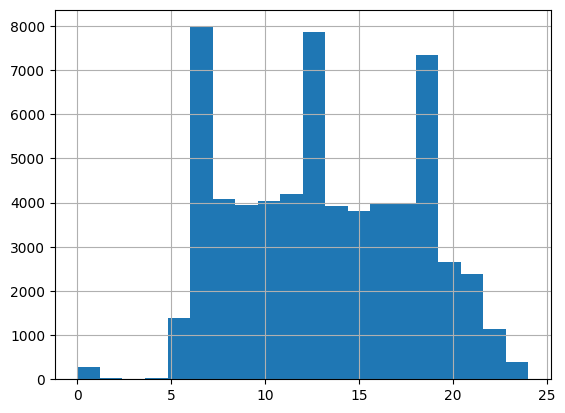

In [91]:
X['DepTime_Hour'].hist(bins=20)

<Axes: >

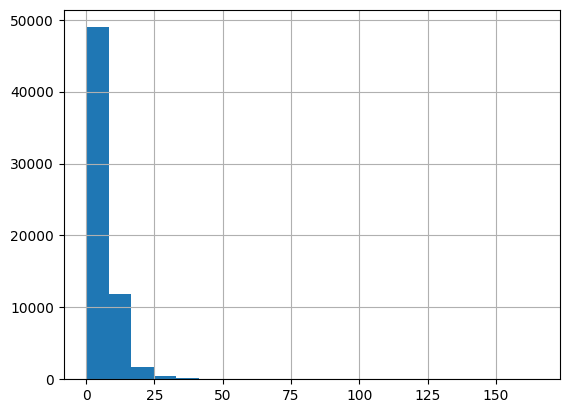

In [92]:
X['TaxiIn'].hist(bins=20)

<Axes: >

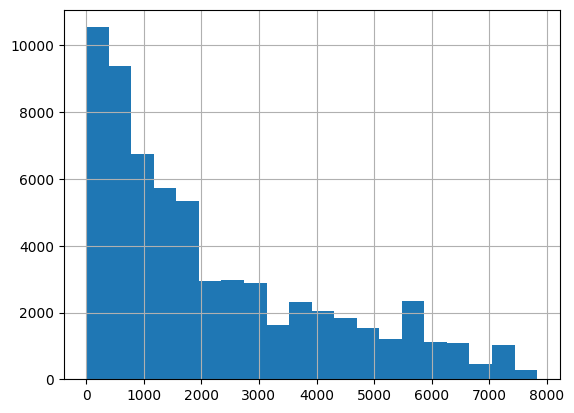

In [93]:
X['FlightNum'].hist(bins=20)

Проблема: все признаки имеют разные масштабы.
 • Некоторые признаки маленькие (например, TaxiIn), другие — большие (FlightNum).
 • Если подать такие данные напрямую в линейную регрессию, модель будет неправильно оценивать важность признаков, потому что признаки с большим масштабом будут “доминировать” над малыми.

Как помогает масштабирование:
 • Масштабирование (например, StandardScaler) приводит все признаки к одному масштабу: среднее 0 и стандартное отклонение 1.
 • Тогда линейная модель справедливо оценивает влияние каждого признака, и обучение становится стабильнее.

In [94]:
from sklearn.preprocessing import StandardScaler

def transform_data(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    df[numeric_cols] = df[numeric_cols].fillna(0)
    df[categorical_cols] = df[categorical_cols].fillna('nan')

    #Масштабируем числовые признаки
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols, index=df.index)

    df_encoded = pd.get_dummies(df[categorical_cols], dummy_na=False)

    #Объединяем числовые и категориальные признаки
    df_final = pd.concat([df_scaled, df_encoded], axis=1)
    return df_final

X_ready = transform_data(X)
print(f"Размерность после преобразования: {X_ready.shape}")

Размерность после преобразования: (63404, 635)


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_ready, y, test_size=0.3, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape[0]} объектов")
print(f"Размер контрольной выборки: {X_test.shape[0]} объектов")
print(f"Количество признаков: {X_train.shape[1]}")

Размер обучающей выборки: 44382 объектов
Размер контрольной выборки: 19022 объектов
Количество признаков: 635


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_subset = X_train[:1000]
y_train_subset = y_train[:1000]

lr = LinearRegression()
lr.fit(X_train_subset, y_train_subset)

y_train_pred = lr.predict(X_train_subset)
y_test_pred = lr.predict(X_test)

mse_train = mean_squared_error(y_train_subset, y_train_pred)
r2_train = r2_score(y_train_subset, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE на обучении: {mse_train:.2f}")
print(f"R^2 на обучении: {r2_train:.2f}")
print(f"MSE на контроле: {mse_test:.2f}")
print(f"R^2 на контроле: {r2_test:.2f}")

print("Первые 10 коэффициентов модели:", lr.coef_[:10])

MSE на обучении: 42.13
R^2 на обучении: 0.96
MSE на контроле: 104.07
R^2 на контроле: 0.92
Первые 10 коэффициентов модели: [-0.26934375 -0.20482406  0.61179184 -1.54768213 21.20436731  0.8612498
 -3.07431292 -7.96840345 -0.33402536  9.55006867]


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [102]:
from sklearn.linear_model import Lasso, Ridge

X_train_subset = X_train[:1000]
y_train_subset = y_train[:1000]

lasso = Lasso(alpha=1.0)
lasso.fit(X_train_subset, y_train_subset)
y_pred_lasso = lasso.predict(X_test)

print("Lasso:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R^2:", r2_score(y_test, y_pred_lasso))
print("Количество ненулевых коэффициентов:", sum(lasso.coef_ != 0))

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_subset, y_train_subset)
y_pred_ridge = ridge.predict(X_test)

print("\nRidge:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R^2:", r2_score(y_test, y_pred_ridge))

Lasso:
MSE: 105.85030104203693
R^2: 0.9208695843786882
Количество ненулевых коэффициентов: 8

Ridge:
MSE: 89.69170339696342
R^2: 0.9329492528815149


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

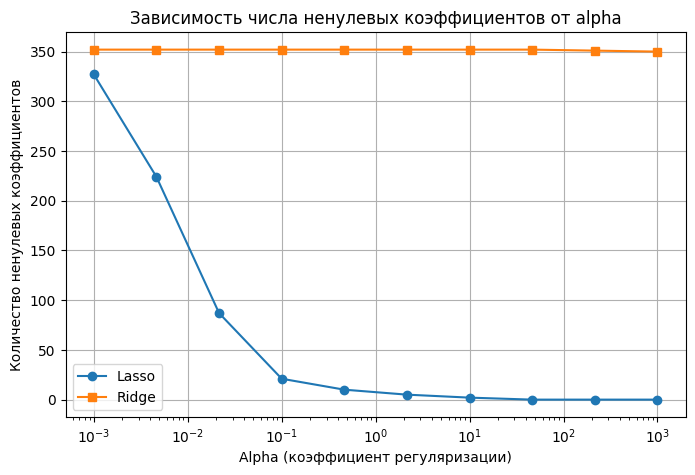

Количество ненулевых коэффициентов для Lasso: [np.int64(327), np.int64(224), np.int64(87), np.int64(21), np.int64(10), np.int64(5), np.int64(2), np.int64(0), np.int64(0), np.int64(0)]
Количество ненулевых коэффициентов для Ridge: [np.int64(352), np.int64(352), np.int64(352), np.int64(352), np.int64(352), np.int64(352), np.int64(352), np.int64(352), np.int64(351), np.int64(350)]


In [104]:
X_sub = X_train[:1000]
y_sub = y_train[:1000]

alphas = np.logspace(-3, 3, 10)

lasso_nonzero = []
ridge_nonzero = []

threshold = 1e-4

for alpha in alphas:

    lasso = Lasso(alpha=alpha, max_iter=5000)
    lasso.fit(X_sub, y_sub)
    lasso_nonzero.append(np.sum(np.abs(lasso.coef_) > threshold))


    ridge = Ridge(alpha=alpha)
    ridge.fit(X_sub, y_sub)
    ridge_nonzero.append(np.sum(np.abs(ridge.coef_) > threshold))


plt.figure(figsize=(8,5))
plt.plot(alphas, lasso_nonzero, label='Lasso', marker='o')
plt.plot(alphas, ridge_nonzero, label='Ridge', marker='s')
plt.xscale('log')
plt.xlabel('Alpha (коэффициент регуляризации)')
plt.ylabel('Количество ненулевых коэффициентов')
plt.title('Зависимость числа ненулевых коэффициентов от alpha')
plt.legend()
plt.grid(True)
plt.show()

print("Количество ненулевых коэффициентов для Lasso:", lasso_nonzero)
print("Количество ненулевых коэффициентов для Ridge:", ridge_nonzero)

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Ridge Regression метрики:")
print(f"RMSE: train={rmse_train:.3f}, test={rmse_test:.3f}")
print(f"MAE: train={mae_train:.3f}, test={mae_test:.3f}")
print(f"R^2: train={r2_train:.3f}, test={r2_test:.3f}")

Ridge Regression метрики:
RMSE: train=17.466, test=18.087
MAE: train=9.688, test=9.844
R^2: train=0.762, test=0.755


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

Лучший коэффициент регуляризации (alpha): 10.0
Обучение: RMSE=8.17, MAE=5.33, R2=0.948
Тест:     RMSE=8.46, MAE=5.39, R2=0.946


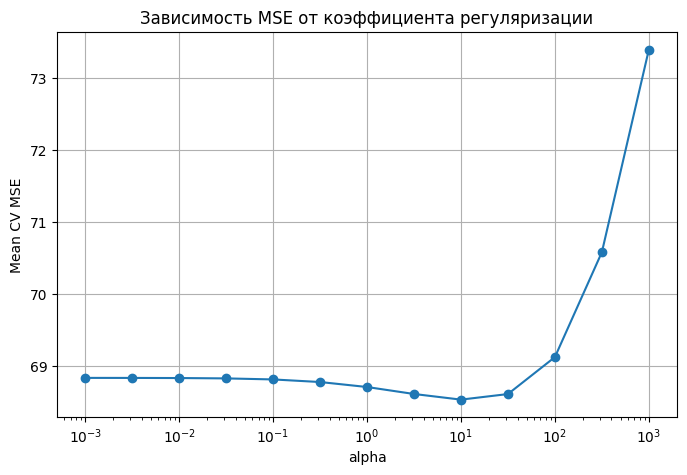

In [106]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



alphas = np.logspace(-3, 3, 13)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

ridge = Ridge()
param_grid = {'alpha': alphas}

grid = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=kf,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)


grid.fit(X_train, y_train)

best_alpha = grid.best_params_['alpha']
print("Лучший коэффициент регуляризации (alpha):", best_alpha)

# Предсказываем на обучении и тесте
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)
y_train_pred = ridge_best.predict(X_train)
y_test_pred = ridge_best.predict(X_test)

def compute_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

train_rmse, train_mae, train_r2 = compute_metrics(y_train, y_train_pred)
test_rmse, test_mae, test_r2 = compute_metrics(y_test, y_test_pred)

print("Обучение: RMSE={:.2f}, MAE={:.2f}, R2={:.3f}".format(train_rmse, train_mae, train_r2))
print("Тест:     RMSE={:.2f}, MAE={:.2f}, R2={:.3f}".format(test_rmse, test_mae, test_r2))


mse_scores = -grid.cv_results_['mean_test_score']
plt.figure(figsize=(8,5))
plt.plot(alphas, mse_scores, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean CV MSE')
plt.title('Зависимость MSE от коэффициента регуляризации')
plt.grid(True)
plt.show()

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

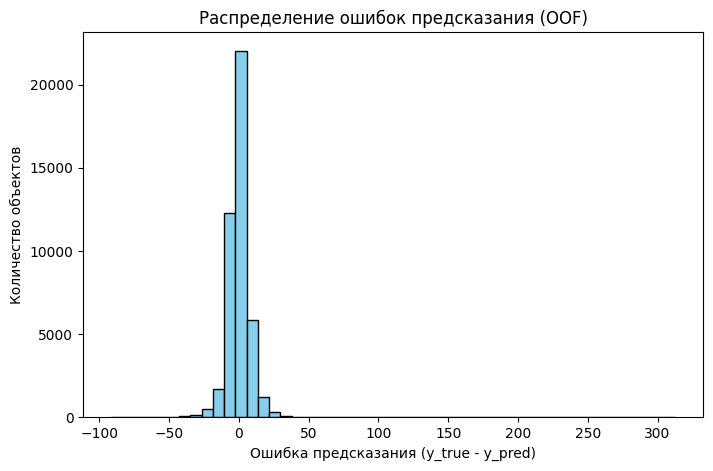

Средняя ошибка: -0.00
Стандартное отклонение ошибки: 8.27
Максимальная ошибка: 312.48
Минимальная ошибка: -91.36


In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict

ridge = Ridge(alpha=10)

y_pred_oof = cross_val_predict(ridge, X_train, y_train, cv=5)

errors = y_train - y_pred_oof

plt.figure(figsize=(8,5))
plt.hist(errors, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Ошибка предсказания (y_true - y_pred)')
plt.ylabel('Количество объектов')
plt.title('Распределение ошибок предсказания (OOF)')
plt.show()


print(f"Средняя ошибка: {np.mean(errors):.2f}")
print(f"Стандартное отклонение ошибки: {np.std(errors):.2f}")
print(f"Максимальная ошибка: {np.max(errors):.2f}")
print(f"Минимальная ошибка: {np.min(errors):.2f}")